## PROBLEM 2

In [146]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as ss

import warnings
warnings.filterwarnings('ignore')

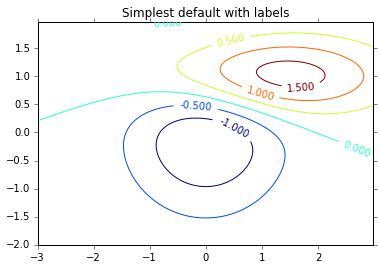

In [15]:
"""
Illustrate simple contour plotting, contours on an image with
a colorbar for the contours, and labelled contours.

See also contour_image.py.
"""

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')

plt.show()

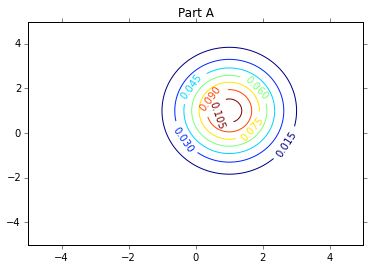

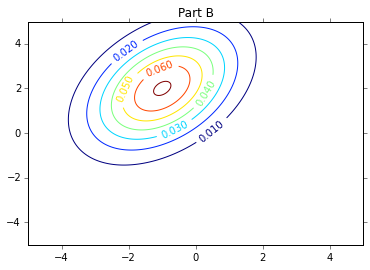

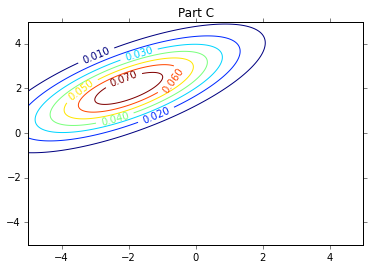

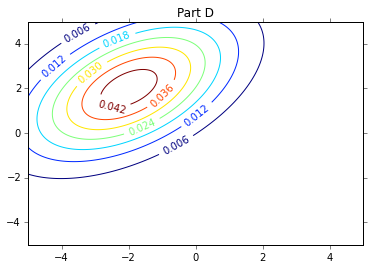

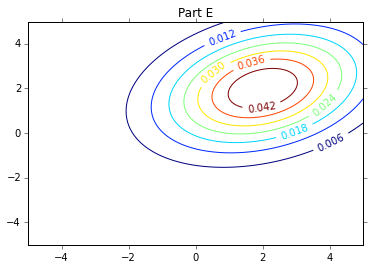

In [25]:
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

plt.figure()
rv = ss.multivariate_normal([1, 1], [[1.0, 0.0], [0.0, 2.0]])
CS = plt.contour(x, y, rv.pdf(pos))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Part A')

plt.figure()
rv = ss.multivariate_normal([-1, 2], [[2.0, 1.0], [1.0, 3.0]])
CS = plt.contour(x, y, rv.pdf(pos))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Part B')

plt.figure()
rv = ss.multivariate_normal([-2, 2], [[4.0, 2.0], [2.0, 2.0]])
CS = plt.contour(x, y, rv.pdf(pos))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Part C')

plt.figure()
rv = ss.multivariate_normal([-2, 2], [[4.0, 2.0], [2.0, 4.0]])
CS = plt.contour(x, y, rv.pdf(pos))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Part D')

plt.figure()
rv = ss.multivariate_normal([2, 2], [[4.0, 1.0], [1.0, 3.0]])
CS = plt.contour(x, y, rv.pdf(pos))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Part E')

## PROBLEM 3

In [5]:
import numpy as np

In [11]:
n = 100
x1 = []
x2 = []
for i in range(n):
    n39 = np.random.normal(3,3)
    x1.append(n39)
    n44 = np.random.normal(2,2)
    x2.append(0.5 * x1[i] + n44)

In [49]:
# Part a: calculating the mean
mean = np.array([np.average(x1), np.average(x2)])
print(mean[0])
print(mean[1])

3.66247749121
3.74710658582


In [25]:
#Part b: calculating the covariance matrix
covX = np.cov(x1, x2)
print(covX)

[[ 7.90997037  5.41319208]
 [ 5.41319208  7.18581373]]


In [29]:
#Part c: eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covX)
print(eigenvalues)
print(eigenvectors)
#for i in range(len(eigenvalues)):
    #print("Eigenvalue: " + eigenvalues[i] + ", eigenvector: " + eigenvectors[i])

[ 12.97317999   2.12260412]
[[ 0.73032151 -0.68310358]
 [ 0.68310358  0.73032151]]


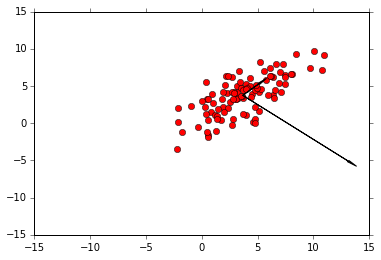

In [46]:
import matplotlib.pyplot as plt
plt.plot(x1, x2, 'ro', zorder=0)
plt.axis([-15, 15, -15, 15])

ax = plt.axes()
ax.arrow(mean[0], mean[1], 
         eigenvectors[0][0]*eigenvalues[0], 
         eigenvectors[0][1]*eigenvalues[0], head_width=0.2, 
         head_length=1, fc='k', ec='k')
ax.arrow(mean[0], mean[1], 
         eigenvectors[1][0]*eigenvalues[1], 
         eigenvectors[1][1]*eigenvalues[1], head_width=0.2, 
         head_length=1, fc='k', ec='k')

plt.show()

[[ 0.73032151  0.68310358]
 [-0.68310358  0.73032151]]


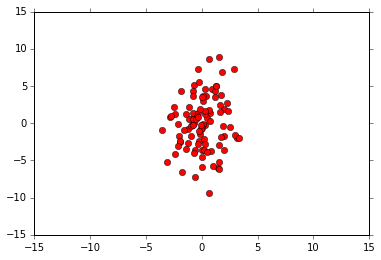

In [51]:
u = np.array([[eigenvectors[0][0], eigenvectors[1][0]],[eigenvectors[0][1], eigenvectors[1][1]]])
print(u)

r1 = []
r2 = []
for i in range(len(x1)):
    x = np.array([x1[i], x2[i]])
    xOrigin = x - mean
    transformed = np.dot(u.T, xOrigin)
    r1.append(transformed[0])
    r2.append(transformed[1])
    
plt.plot(r1, r2, 'ro', zorder=0)
plt.axis([-15, 15, -15, 15])
plt.show()

# PROBLEM 6

In [125]:
import scipy
import scipy.io
import math
import sklearn.preprocessing

import warnings
warnings.filterwarnings('ignore')

In [97]:
mnist = scipy.io.loadmat("./hw3_mnist_dist/train")
#print(mnist["trainX"])
indices = [[] for i in range(10)]
for i in range(len(mnist["trainX"])):
    data = mnist["trainX"][i]
    label = data[len(data) - 1]
    indices[label].append(i)

In [126]:
means = []

for digitIndex in range(10):
    indicesOfDigits = indices[digitIndex]
    vectorLen = len(mnist["trainX"][0]) - 1
    mean = np.zeros((vectorLen,1))
    
    #print(mean.shape)
    #example = np.array([mnist["trainX"][index][0:vectorLen]])
    #print(example.shape)
    
    for index in indicesOfDigits:
        data = np.transpose(np.array([mnist["trainX"][index][0:vectorLen]]))
        data = sklearn.preprocessing.normalize(data)
        mean = np.add(mean, data)
        
    mean = np.multiply(mean, 1.0/float(len(indicesOfDigits)))
    means.append(mean)

In [134]:


def l2norm(arr, begin, end):
    total = 0
    for i in range(begin, end, 1):
        total += float(arr[i]*arr[i])
    return math.sqrt(total)
    
    #norm = l2norm(data, 0, len(data) - 1)
    #mnist["trainX"][i] = np.multiply(data, 1.0/float(norm))
    
#data = np.array([1,2,3,4,5])
#norm = l2norm(data, 0, 5)
#datascaled = np.multiply(data, 1/float(norm))
#print(datascaled)

covs = []

#print(indices[5])
    
for digitIndex in range(0,10):
    print("Calculating covariance for " + str(digitIndex))
    indicesOfDigits = indices[digitIndex]
    vectorLen = len(mnist["trainX"][0]) - 1
    
    cov = np.zeros((784, 784))
    mean = means[digitIndex]
    
    for index in indicesOfDigits:
        data = np.transpose(np.array([mnist["trainX"][index][0:vectorLen]]))
        data = sklearn.preprocessing.normalize(data)
        
        deviation = np.subtract(data, mean)
        entry = np.dot(deviation, np.transpose(deviation))
        cov = np.add(cov, entry)
            
    cov = np.multiply(cov, 1.0/float(len(indicesOfDigits)))
    
    covs.append(cov)
    

Calculating covariance for 0
Calculating covariance for 1
Calculating covariance for 2
Calculating covariance for 3
Calculating covariance for 4
Calculating covariance for 5
Calculating covariance for 6
Calculating covariance for 7
Calculating covariance for 8
Calculating covariance for 9


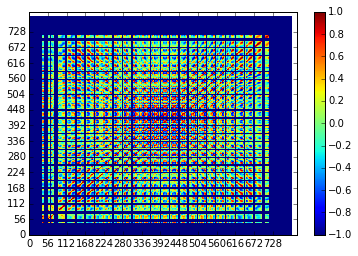

In [133]:
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks

# plotting the correlation matrix
R = corrcoef(covs[0])
pcolor(R)
colorbar()
plt.clim(-1,1)
yticks(arange(0,784,56),range(0,784,56))
xticks(arange(0,784,56),range(0,784,56))
show()

In [163]:
#print(covs[0][133][580])
#print(covs[0][580][133])

from random import shuffle

#for i in range(784):
    #print(covs[0][i][i])
vectorLen = len(mnist["trainX"][0]) - 1    
    
avgCov = np.zeros((784, 784))
for i in range(10):
    avgCov = np.add(avgCov, covs[i])
np.multiply(avgCov, 0.1)

#avgCov += 1
for i in range(784):
    avgCov[i][i] += 0.0000001
    
covinv = np.linalg.inv(avgCov)

randomIndices = [i for i in range(0,len(mnist["trainX"]))]
shuffle(randomIndices)
randomIndices = randomIndices[0:100]
for index in randomIndices:
    data = np.transpose(np.array([mnist["trainX"][index][0:vectorLen]]))
    max_lda = 0
    max_index = -1
    for digit in range(10):
        mean_c = means[digit]
        pi_c = len(indices[digit]) / len(mnist["trainX"])
        left = np.dot(np.transpose(mean_c), np.dot(covinv, data))
        middle = np.dot(np.transpose(mean_c), np.dot(covinv, mean_c))
        right = np.log(pi_c)
        score = left - 0.5*middle + right
        score = score[0][0]
        if score > max_lda or max_index == -1:
            max_index = digit
            max_lda = score
            #print("Set: " + str(max_index) + " " + str(max_lda))
    print("Data Index: " + str(index) + ", Predicted Class: " + str(max_index))
    print("Actual Class: " + str(mnist["trainX"][index][-1]))
        

Data Index: 36343, Predicted Class: 6
Actual Class: 6
Data Index: 44531, Predicted Class: 0
Actual Class: 0
Data Index: 50182, Predicted Class: 4
Actual Class: 4
Data Index: 51676, Predicted Class: 6
Actual Class: 6
Data Index: 21415, Predicted Class: 2
Actual Class: 3
Data Index: 27415, Predicted Class: 6
Actual Class: 6
Data Index: 20571, Predicted Class: 9
Actual Class: 9
Data Index: 3669, Predicted Class: 5
Actual Class: 5
Data Index: 40233, Predicted Class: 8
Actual Class: 8
Data Index: 10812, Predicted Class: 4
Actual Class: 4
Data Index: 39345, Predicted Class: 7
Actual Class: 7
Data Index: 50117, Predicted Class: 8
Actual Class: 8
Data Index: 29929, Predicted Class: 9
Actual Class: 4
Data Index: 42706, Predicted Class: 8
Actual Class: 8
Data Index: 4109, Predicted Class: 8
Actual Class: 1
Data Index: 5954, Predicted Class: 9
Actual Class: 4
Data Index: 37849, Predicted Class: 1
Actual Class: 1
Data Index: 41604, Predicted Class: 7
Actual Class: 7
Data Index: 2329, Predicted Cla